In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

file_folder = "../data"

In [129]:
train = pd.read_csv(f"{file_folder}/train.csv")

In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Gender    891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [144]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [138]:
# Drop name, ticket, cabin, embarked and passenger ID -> they seem irrelevant
# Turn sex to number
try:
    del train["Embarked"]
    del train["PassengerId"]
    del train["Name"]
    del train["Ticket"]
    del train["Cabin"]
except KeyError:
    pass
train["Gender"] = np.where(train["Sex"] == "male", 1,0)
del train["Sex"]
print(train.describe())
print(train.Sex)
train.shape

         Survived      Pclass         Age       SibSp       Parch        Fare  \
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208   
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429   
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400   
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200   
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000   
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200   

           Gender  
count  891.000000  
mean     0.647587  
std      0.477990  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  


AttributeError: 'DataFrame' object has no attribute 'Sex'

(array([[ 36.,  19.,  63.,  65.,  52.,  24.,  21.,   9.,   0.,   1.],
        [ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 2 BarContainer objects>)

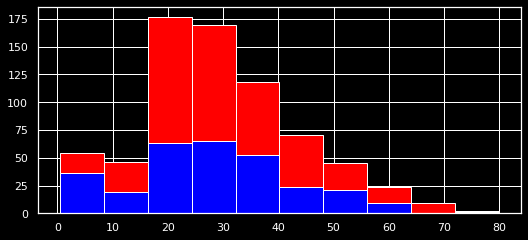

In [139]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
x = [survived["Age"], died["Age"]]
plt.hist(x, bins=10, color=["blue", "red"], fill=True, stacked=True)



     Survived  Pclass   Age  SibSp  Parch     Fare  Gender
1           1       1  38.0      1      0  71.2833       0
2           1       3  26.0      0      0   7.9250       0
3           1       1  35.0      1      0  53.1000       0
8           1       3  27.0      0      2  11.1333       0
9           1       2  14.0      1      0  30.0708       0
..        ...     ...   ...    ...    ...      ...     ...
874         1       2  28.0      1      0  24.0000       0
875         1       3  15.0      0      0   7.2250       0
879         1       1  56.0      0      1  83.1583       0
880         1       2  25.0      0      1  26.0000       0
887         1       1  19.0      0      0  30.0000       0

[233 rows x 7 columns]


(array([[233.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 109.],
        [314.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 577.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

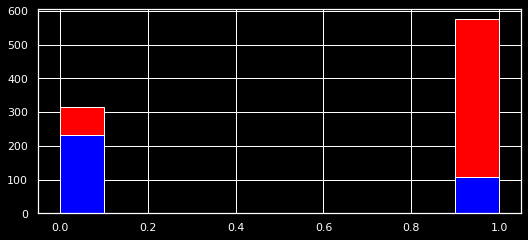

In [140]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
print(survived[survived["Gender"] == 0])
x = [survived["Gender"], died["Gender"]]
plt.hist(x, bins=10, color=["blue", "red"], fill=True, stacked=True)


(array([[136.,   0.,   0.,   0.,   0.,  87.,   0.,   0.,   0., 119.],
        [216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 2 BarContainer objects>)

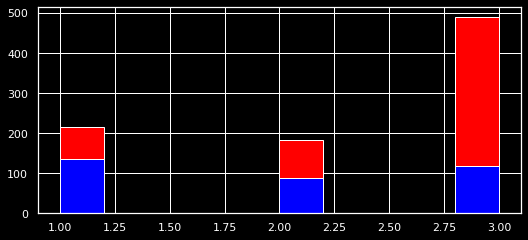

In [141]:
x = [survived["Pclass"], died["Pclass"]]
plt.hist(x, bins=10, color=["blue", "red"], fill=True, stacked=True)

In [142]:
correlation = train.corr()
print(correlation['Survived'].sort_values(ascending=False), '\n')

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Gender     -0.543351
Name: Survived, dtype: float64 



Index(['Survived', 'Fare', 'Parch', 'SibSp', 'Age', 'Pclass', 'Gender'], dtype='object')


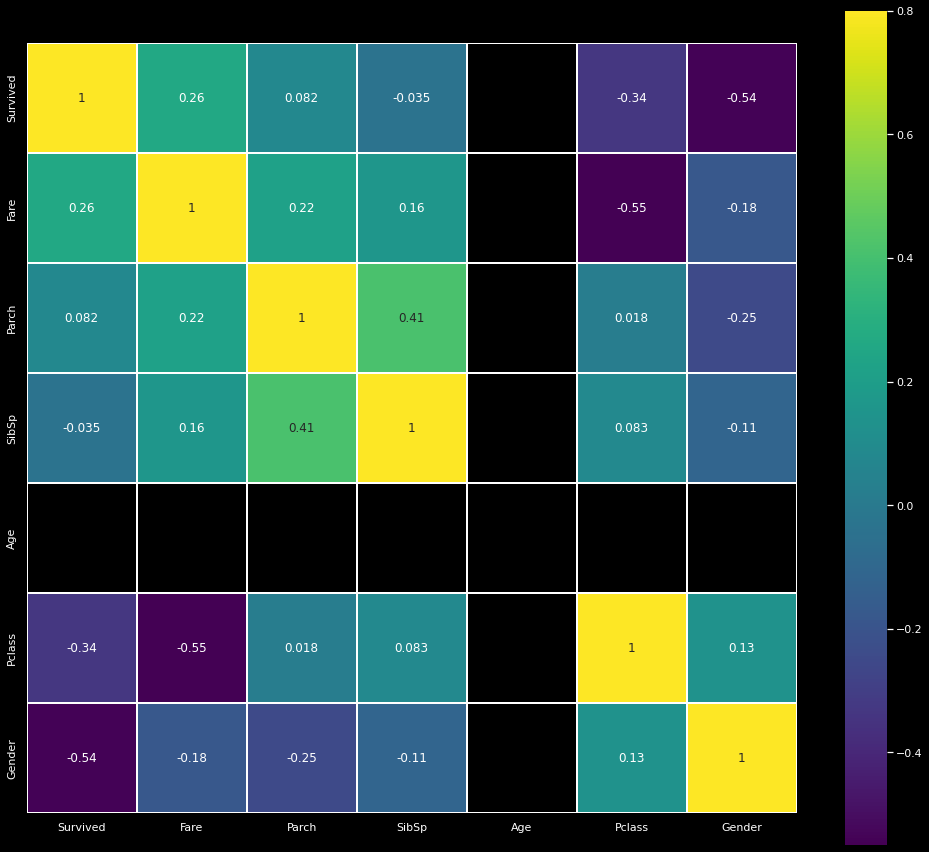

In [143]:
k = 10
cols = correlation.nlargest(k, 'Survived')['Survived'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor="white", xticklabels=cols.values, annot_kws={'size': 12}, yticklabels=cols.values)
plt.show()

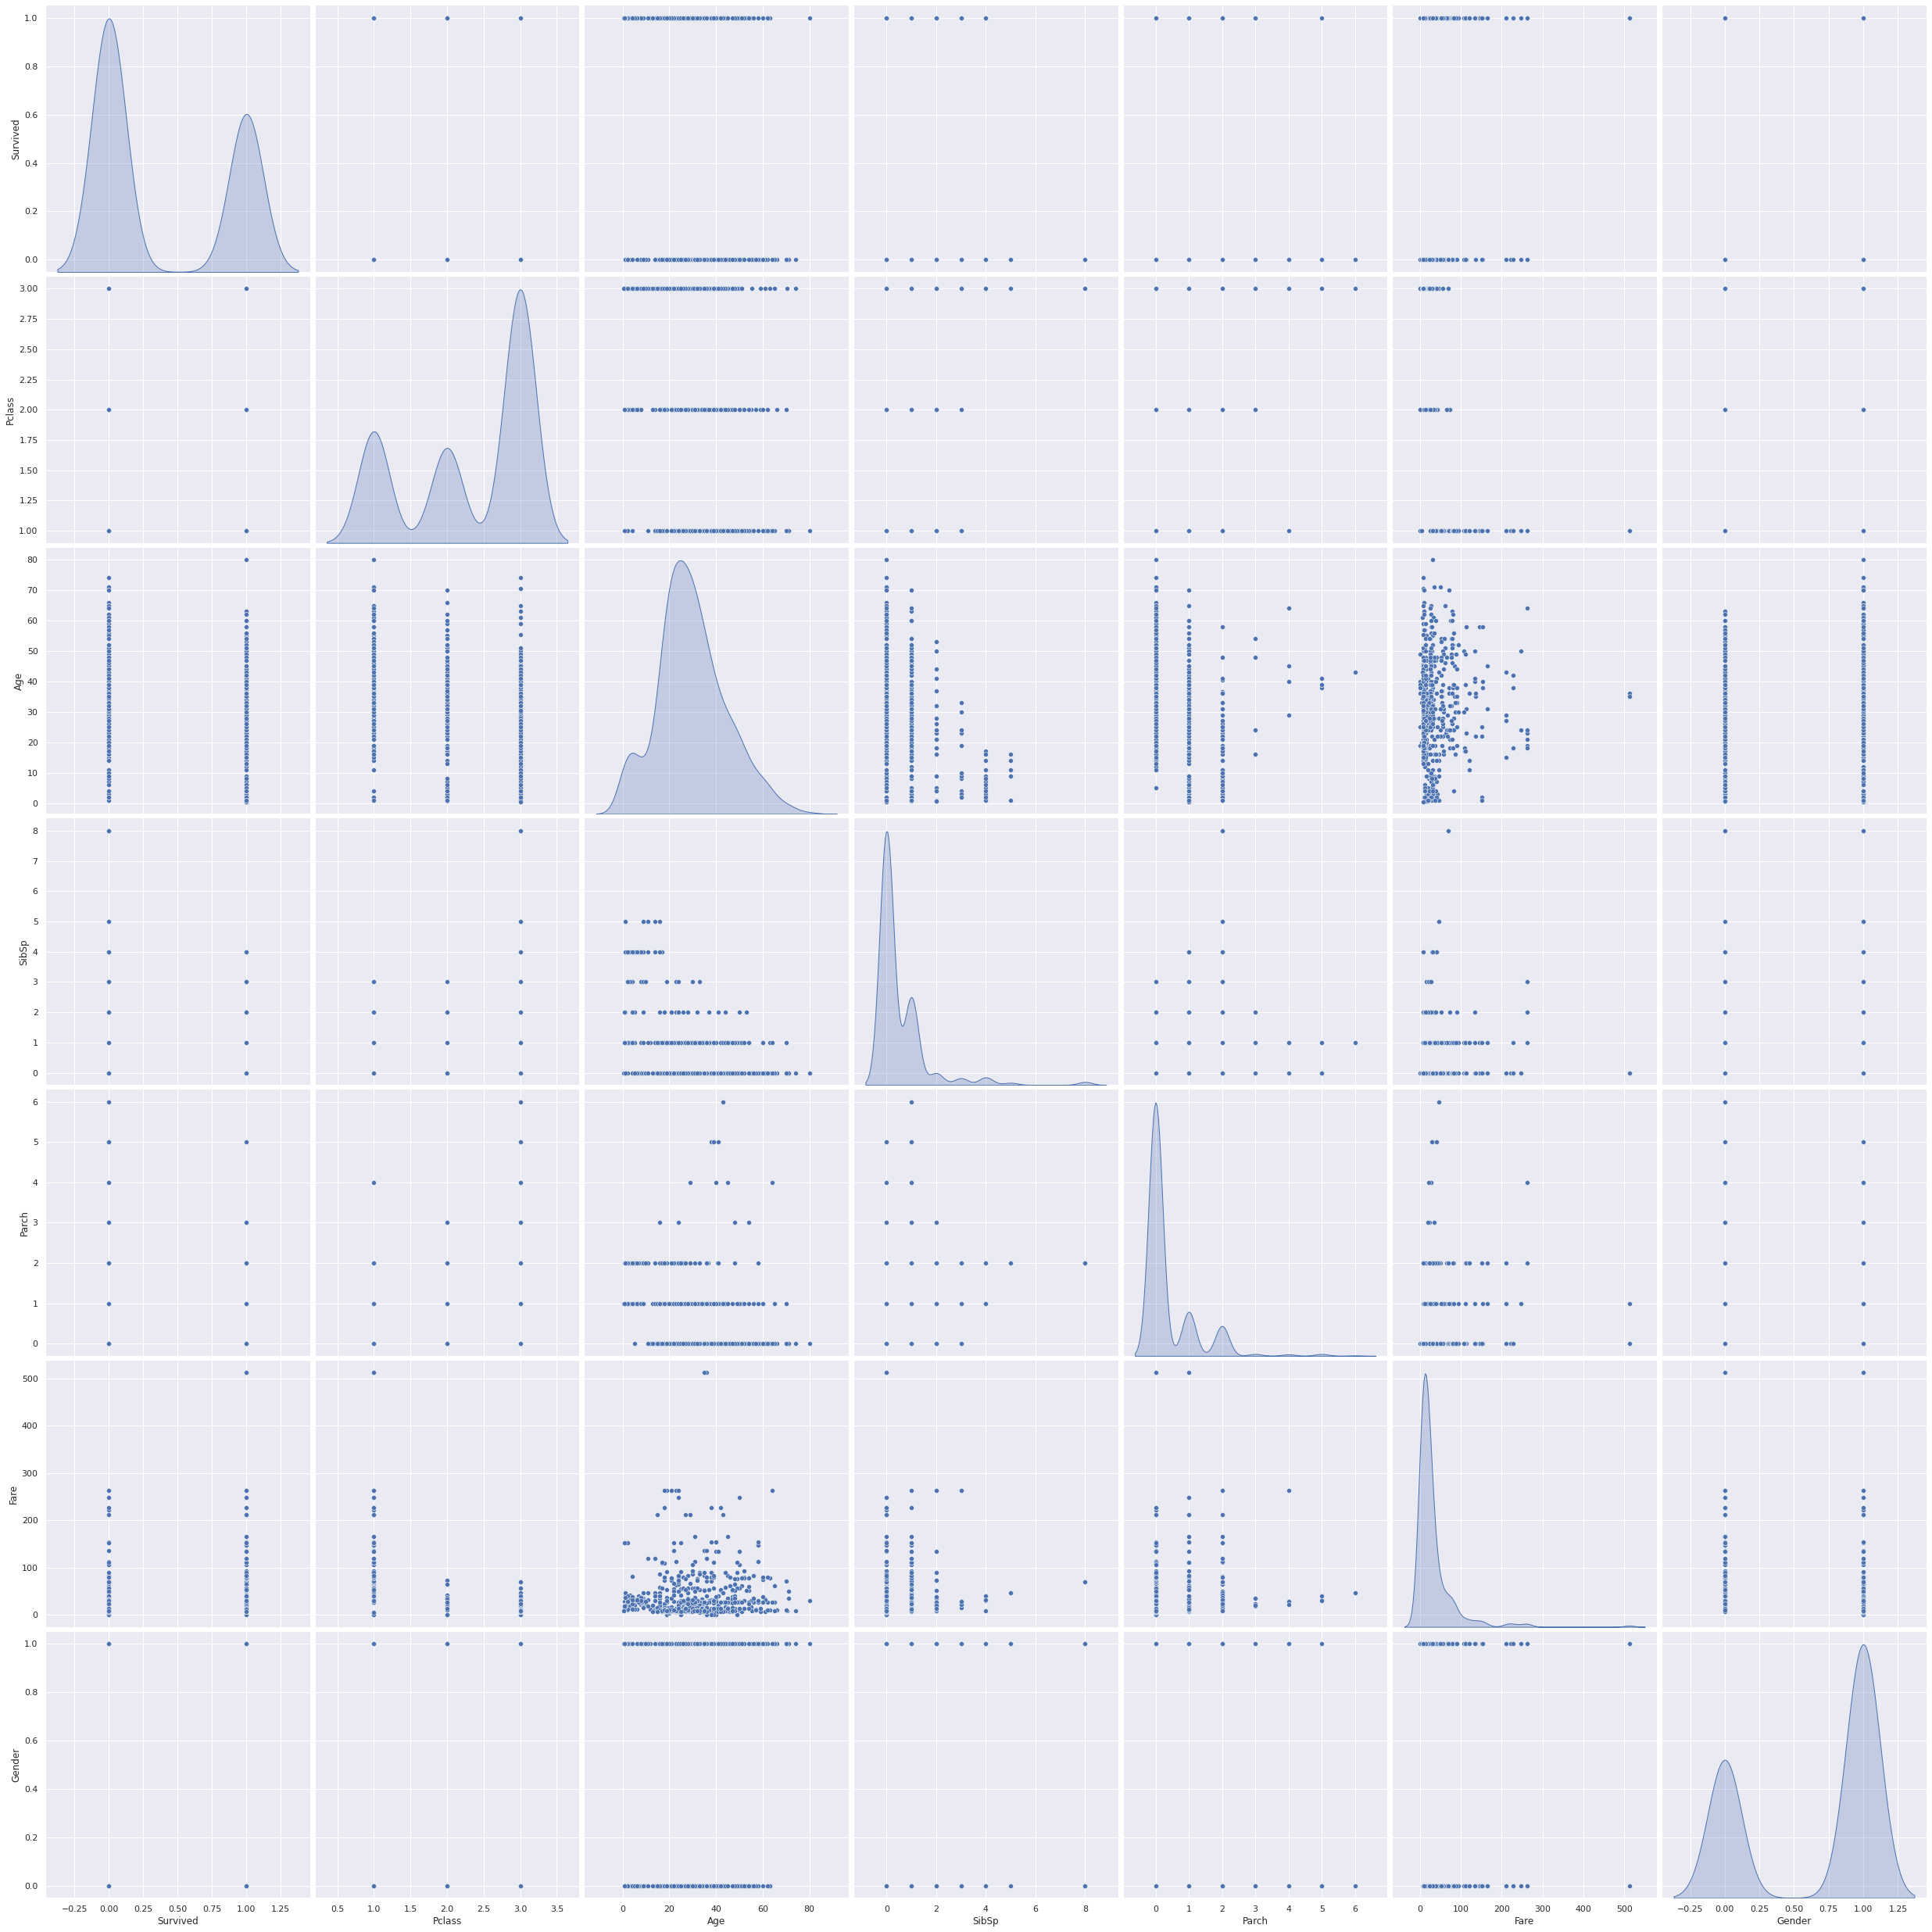

In [146]:
sns.set()
sns.pairplot(train, height=5, kind='scatter', diag_kind='kde')
plt.show()

In [148]:
print("Based on sex")
print(len(survived[survived["Gender"] == 0]) / len(train[train["Gender"] == 0]))
print(len(survived[survived["Gender"] == 1]) / len(train[train["Gender"] == 1]))

print("Based on class")
print(len(survived[survived["Pclass"] == 1]) / len(train[train["Pclass"] == 1]))
print(len(survived[survived["Pclass"] == 2]) / len(train[train["Pclass"] == 2]))
print(len(survived[survived["Pclass"] == 3]) / len(train[train["Pclass"] == 3]))

print("Adult vs child")
age_limit = 18
print(len(survived[survived["Age"] > age_limit]) / len(train[train["Age"] > age_limit]))
print(len(survived[survived["Age"] < age_limit]) / len(train[train["Age"] < age_limit]))

Based on sex
0.7420382165605095
0.18890814558058924
Based on class
0.6296296296296297
0.47282608695652173
0.24236252545824846
Adult vs child
0.3826086956521739
0.5398230088495575


(array([[ 36.,  19.,  63.,  65.,  52.,  24.,  21.,   9.,   0.,   1.],
        [ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 2 BarContainer objects>)

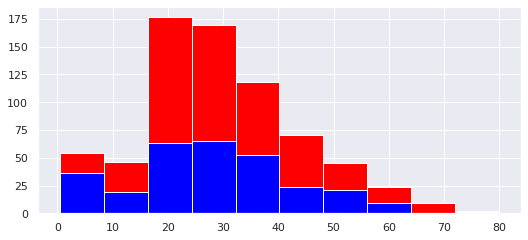

In [149]:
x = [survived["Age"], died["Age"]]
plt.hist(x, bins=10, color=["blue", "red"], fill=True, stacked=True)